In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import numpy as np 
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes

In [37]:
data = pd.read_csv("df_par_id.csv")

In [38]:
data.columns

Index(['Unnamed: 0', 'customer_unique_id', 'freight_value', 'review_score',
       'score_freq', 'price_y', 'score_rec', 'score_montant', 'score_rfm',
       'customer_city', 'order_id', 'product_id', 'seller_id',
       'categorie_regroupee'],
      dtype='object')

In [39]:
data = data[[ 'customer_unique_id', 'freight_value', 'review_score',
       'score_freq',  'score_rec', 'score_montant',
       'customer_city', 
       'categorie_regroupee']]

In [40]:
data.dtypes

customer_unique_id      object
freight_value          float64
review_score           float64
score_freq             float64
score_rec              float64
score_montant          float64
customer_city           object
categorie_regroupee     object
dtype: object

In [41]:
data = data.dropna()

In [42]:
missing_values = data.isnull().sum()
print(missing_values)


customer_unique_id     0
freight_value          0
review_score           0
score_freq             0
score_rec              0
score_montant          0
customer_city          0
categorie_regroupee    0
dtype: int64


### K prototypes

In [43]:

import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes

# sélectionner les colonnes numériques et catégorielles
numeric_cols = [col for col in data.columns if data[col].dtype in [np.float64, np.int64]]
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']

# séparer les colonnes numériques et catégorielles dans deux dataframes distincts
numeric_data = data[numeric_cols]
categorical_data = data[categorical_cols]

# standardiser les colonnes numériques
numeric_data = (numeric_data - numeric_data.mean()) / numeric_data.std()

# combiner les deux dataframes (numériques et catégorielles)
data_combined = pd.concat([numeric_data, categorical_data], axis=1)

# initialiser l'algorithme K-Prototypes avec les paramètres nécessaires
kproto = KPrototypes(n_clusters=4, init='Huang',n_jobs = -1 , max_iter = 20, n_init=2, verbose=2)

 # entraîner le modèle sur les données combinées
clusters = kproto.fit_predict(data_combined, categorical=list(range(len(numeric_cols), data_combined.shape[1])))

# afficher les résultats
print("Cluster labels:", clusters) 

Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Starting iterations...
Starting iterations...
Run: 2, iteration: 1/20, moves: 20075, ncost: 430624.3083111435
Run: 1, iteration: 1/20, moves: 27043, ncost: 435506.89120754146
Run: 2, iteration: 2/20, moves: 7660, ncost: 428649.95094597654
Run: 1, iteration: 2/20, moves: 17189, ncost: 413869.18003828416
Run: 2, iteration: 3/20, moves: 2503, ncost: 428006.3167155837
Run: 1, iteration: 3/20, moves: 5096, ncost: 412456.1970704933
Run: 2, iteration: 4/20, moves: 3551, ncost: 426579.6391213026
Run: 1, iteration: 4/20, moves: 713, ncost: 412404.3080828386
Run: 2, iteration: 5/20, moves: 3441, ncost: 425615.1416944775
Run: 1, iteration: 5/20, moves: 275, ncost: 412393.1440048232
Run: 2, iteration: 6/20, moves: 1945, ncost: 425306.8694503921
Run: 1, iteration: 6/20, moves: 77, ncost: 412391.430451491
Run: 2, iteration: 7/20, moves: 2365, ncost: 424748.7171192871
Run: 1, iteration: 7

In [44]:
data_combined

,freight_value,review_score,score_freq,score_rec,score_montant,customer_unique_id,customer_city,categorie_regroupee
0,-0.519895,0.676686,-0.056261,0.711385,0.716408,0000366f3b9a7992bf8c76cfdf3221e2,cajamar,Mobilier
1,-0.754467,-0.077031,-0.056261,0.711385,-1.387374,0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,Beauté et Santé
2,-0.189850,-0.830748,-0.056261,-1.409269,-0.686113,0000f46a3911fa3c0805444483337064,sao jose,Livre et Papeterie
3,-0.163927,-0.077031,-0.056261,-0.702384,-1.387374,0000f6ccb0745a6a4b88665a16c9f078,belem,Technologie
4,-0.210715,0.676686,-0.056261,-0.702384,1.417668,0004aac84e0df4da2b147fca70cf8255,sorocaba,Technologie
...,...,...,...,...,...,...,...,...
94716,14.446570,0.676686,-0.056261,-1.409269,1.417668,fffcf5a5ff07b0908bd4e2dbc735a684,sanharo,Beauté et Santé
94717,-0.033679,-0.077031,-0.056261,0.004500,-0.686113,fffea47cd6d3cc0a88bd621562a9d061,feira de santana,Alimentation
94718,0.147783,0.676686,-0.056261,-1.409269,0.015147,ffff371b4d645b6ecea244b27531430a,sinop,Bricolage et Jardin
94719,-0.096906,0.676686,-0.056261,0.711385,0.716408,ffff5962728ec6157033ef9805bacc48,bom jesus do norte,Mode


In [45]:
clusters

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [46]:
data_combined["cluster"] = clusters

In [47]:
data_combined

,freight_value,review_score,score_freq,score_rec,score_montant,customer_unique_id,customer_city,categorie_regroupee,cluster
0,-0.519895,0.676686,-0.056261,0.711385,0.716408,0000366f3b9a7992bf8c76cfdf3221e2,cajamar,Mobilier,1
1,-0.754467,-0.077031,-0.056261,0.711385,-1.387374,0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,Beauté et Santé,1
2,-0.189850,-0.830748,-0.056261,-1.409269,-0.686113,0000f46a3911fa3c0805444483337064,sao jose,Livre et Papeterie,0
3,-0.163927,-0.077031,-0.056261,-0.702384,-1.387374,0000f6ccb0745a6a4b88665a16c9f078,belem,Technologie,0
4,-0.210715,0.676686,-0.056261,-0.702384,1.417668,0004aac84e0df4da2b147fca70cf8255,sorocaba,Technologie,2
...,...,...,...,...,...,...,...,...,...
94716,14.446570,0.676686,-0.056261,-1.409269,1.417668,fffcf5a5ff07b0908bd4e2dbc735a684,sanharo,Beauté et Santé,2
94717,-0.033679,-0.077031,-0.056261,0.004500,-0.686113,fffea47cd6d3cc0a88bd621562a9d061,feira de santana,Alimentation,0
94718,0.147783,0.676686,-0.056261,-1.409269,0.015147,ffff371b4d645b6ecea244b27531430a,sinop,Bricolage et Jardin,0
94719,-0.096906,0.676686,-0.056261,0.711385,0.716408,ffff5962728ec6157033ef9805bacc48,bom jesus do norte,Mode,1


In [48]:
numeric_data["cluster"] = clusters

In [49]:
from sklearn.manifold import TSNE

# create the t-SNE object with the desired parameters
tsne = TSNE()

# fit and transform the data
reduced_data = tsne.fit_transform(numeric_data)



In [50]:
numeric_data

,freight_value,review_score,score_freq,score_rec,score_montant,cluster
0,-0.519895,0.676686,-0.056261,0.711385,0.716408,1
1,-0.754467,-0.077031,-0.056261,0.711385,-1.387374,1
2,-0.189850,-0.830748,-0.056261,-1.409269,-0.686113,0
3,-0.163927,-0.077031,-0.056261,-0.702384,-1.387374,0
4,-0.210715,0.676686,-0.056261,-0.702384,1.417668,2
...,...,...,...,...,...,...
94716,14.446570,0.676686,-0.056261,-1.409269,1.417668,2
94717,-0.033679,-0.077031,-0.056261,0.004500,-0.686113,0
94718,0.147783,0.676686,-0.056261,-1.409269,0.015147,0
94719,-0.096906,0.676686,-0.056261,0.711385,0.716408,1


Text(0, 0.5, 't-SNE Dimension 2')

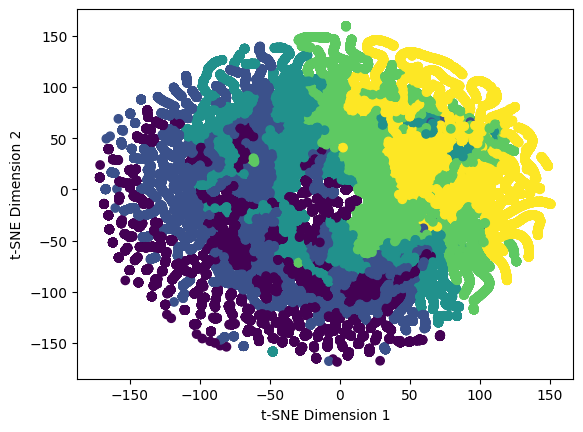

In [51]:
# plot the transformed data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=numeric_data["score_montant"])
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

Text(0, 0.5, 't-SNE Dimension 2')

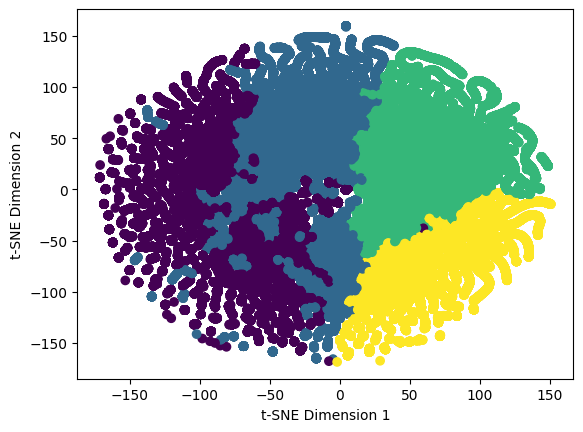

In [53]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=numeric_data["cluster"])
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

In [ ]:
data_combined.to_csv("df_cluster2.csv")